In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('terra_indigena.csv')
df

,id_geografico,id_terra_indigena,terra_indigena,etnia,nome_municipio,sigla_uf,area,fase,modalidade,reestudo,indicador_faixa_fronteira,id_unidade_administrativa,sigla_unidade_administrativa,unidade_administrativa,geometria
0,249,8501,Camicua,Apurinã,Boca do Acre,AM,58519.5999,Regularizada,Tradicionalmente ocupada,NaN,False,30202001845,CR-ALPUR,Coordenacao Regional Alto Purus,"POLYGON((-67.62311895 -8.48101932, -67.6257289..."
1,1315,15601,Igarapé Capana,Jamamadí,Boca do Acre,AM,122555.6647,Regularizada,Tradicionalmente ocupada,NaN,False,30202001845,CR-ALPUR,Coordenacao Regional Alto Purus,"POLYGON((-68.0026920349277 -8.69476860778759, ..."
2,1379,22201,Kaxinawá Colônia Vinte e Sete,Kaxinawá,Tarauacá,AC,105.1664,Regularizada,Tradicionalmente ocupada,NaN,False,30202001852,CR-JUR,Coordenacao Regional Do Juruá,"POLYGON((-70.7826698023795 -8.10530833659898, ..."
3,1447,29201,Miratu,Miránha,Uarini,AM,13198.7880,Regularizada,Tradicionalmente ocupada,NaN,False,30202001857,CR-AS,Coordenacao Regional Do Alto Solimoes,"POLYGON((-65.2775394695838 -2.9780594156763, -..."
4,1279,12001,Estrela da Paz,Tikúna,Jutaí,AM,12876.4893,Regularizada,Tradicionalmente ocupada,NaN,False,30202001857,CR-AS,Coordenacao Regional Do Alto Solimoes,"POLYGON((-66.8178072454343 -2.76997087271742, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,86,39001,Rio das Cobras,"Guaraní,Kaingang","Nova Laranjeiras,Espigão Alto do Iguaçu",PR,18681.9806,Regularizada,Tradicionalmente ocupada,NaN,True,30202002408,CR-GRP,Coordenacao Regional De Guarapuava,"POLYGON((-52.7411035518172 -25.2258593989664, ..."
611,43,4701,Avá-Guarani do Ocoí,Guarani Kaiowá,São Miguel do Iguaçu,PR,231.8870,Regularizada,Reserva Indígena,NaN,True,30202002408,CR-GRP,Coordenacao Regional De Guarapuava,"POLYGON((-54.3333335711159 -25.238164174343, -..."
612,146,26401,Mangueirinha,"Guaraní,Kaingang","Mangueirinha,Coronel Vivida,Chopinzinho",PR,16375.7600,Regularizada,Tradicionalmente ocupada,NaN,True,30202002408,CR-GRP,Coordenacao Regional De Guarapuava,"POLYGON((-52.2863989803 -25.7976183049, -52.28..."
613,50,50401,Herarekã Xetá,Xetá,Ivaté,PR,2686.0000,Delimitada,Tradicionalmente ocupada,NaN,True,30202002408,CR-GRP,Coordenacao Regional De Guarapuava,"POLYGON((-53.3994444651307 -23.4342310867157, ..."


In [9]:
df.isnull().sum()

id_geografico                     0
id_terra_indigena                 0
terra_indigena                    0
etnia                             0
nome_municipio                    0
sigla_uf                          0
area                              0
fase                              0
modalidade                        0
reestudo                        587
indicador_faixa_fronteira         0
id_unidade_administrativa         0
sigla_unidade_administrativa      0
unidade_administrativa            0
geometria                         0
dtype: int64

In [10]:
df['reestudo'] = df['reestudo'].fillna(' ')
df.isnull().sum()

id_geografico                   0
id_terra_indigena               0
terra_indigena                  0
etnia                           0
nome_municipio                  0
sigla_uf                        0
area                            0
fase                            0
modalidade                      0
reestudo                        0
indicador_faixa_fronteira       0
id_unidade_administrativa       0
sigla_unidade_administrativa    0
unidade_administrativa          0
geometria                       0
dtype: int64

In [11]:
df.columns

Index(['id_geografico', 'id_terra_indigena', 'terra_indigena', 'etnia',
       'nome_municipio', 'sigla_uf', 'area', 'fase', 'modalidade', 'reestudo',
       'indicador_faixa_fronteira', 'id_unidade_administrativa',
       'sigla_unidade_administrativa', 'unidade_administrativa', 'geometria'],
      dtype='object')

In [12]:
df_final = df.drop(['area', 'reestudo','indicador_faixa_fronteira', 'geometria'], axis = 1)

In [13]:
df_etnia = df['etnia'].count()
df_etnia

615

In [14]:
df_etnia_estado = df.groupby('sigla_uf')['etnia'].count().sort_values(ascending=False)
df_etnia_estado

sigla_uf
AM          141
MT           66
MS           48
PA           47
RR           30
AC           30
RS           28
SP           27
SC           24
PR           23
BA           23
MA           20
RO           19
PE           14
TO           10
MG           10
AL           10
CE            8
GO            5
RJ            4
AP            4
PB            3
ES            3
PA,MT         2
RO,MT         2
RR,AM         2
MT,PA         2
AM,PA         2
AP,PA         1
PR,SC         1
MT,RO         1
AM,AC         1
RR,AM,PA      1
SE            1
AM,RO         1
TO,PA         1
Name: etnia, dtype: int64

In [15]:
df_amazonas = df_final[df_final['sigla_uf'] == "AM"]
df_amazonas

,id_geografico,id_terra_indigena,terra_indigena,etnia,nome_municipio,sigla_uf,fase,modalidade,id_unidade_administrativa,sigla_unidade_administrativa,unidade_administrativa
0,249,8501,Camicua,Apurinã,Boca do Acre,AM,Regularizada,Tradicionalmente ocupada,30202001845,CR-ALPUR,Coordenacao Regional Alto Purus
1,1315,15601,Igarapé Capana,Jamamadí,Boca do Acre,AM,Regularizada,Tradicionalmente ocupada,30202001845,CR-ALPUR,Coordenacao Regional Alto Purus
3,1447,29201,Miratu,Miránha,Uarini,AM,Regularizada,Tradicionalmente ocupada,30202001857,CR-AS,Coordenacao Regional Do Alto Solimoes
4,1279,12001,Estrela da Paz,Tikúna,Jutaí,AM,Regularizada,Tradicionalmente ocupada,30202001857,CR-AS,Coordenacao Regional Do Alto Solimoes
5,1672,52201,Barro Alto,Kokama,Tonantins,AM,Regularizada,Tradicionalmente ocupada,30202001857,CR-AS,Coordenacao Regional Do Alto Solimoes
...,...,...,...,...,...,...,...,...,...,...,...
482,118,67401,Jurubaxi-téa,"Desána,Kuripako,Tikúna,Tariana,Arapáso,Piratap...","Barcelos,Santa Isabel do Rio Negro",AM,Declarada,Tradicionalmente ocupada,30202001885,CR-RNG,Coordenacao Regional Do Rio Negro
483,1211,5301,Balaio,"Tukano,Tariana,Desána",São Gabriel da Cachoeira,AM,Regularizada,Tradicionalmente ocupada,30202001885,CR-RNG,Coordenacao Regional Do Rio Negro
484,1706,59601,Cué Cué/ Marabitanas,Baré,São Gabriel da Cachoeira,AM,Declarada,Tradicionalmente ocupada,30202001885,CR-RNG,Coordenacao Regional Do Rio Negro
485,15,1101,Alto Rio Negro,"Arapáso,Karapanã,Barasána,Baré,Wanana","Japurá,São Gabriel da Cachoeira",AM,Regularizada,Tradicionalmente ocupada,30202001885,CR-RNG,Coordenacao Regional Do Rio Negro


In [16]:
etnia_am = df_amazonas.groupby('etnia').size().sort_values(ascending=False)
etnia_am

etnia
Múra                                                                          34
Tikúna                                                                        22
Apurinã                                                                       20
Kokama                                                                         9
Tenharim                                                                       4
Paumarí                                                                        4
Kanamarí                                                                       3
Diahói                                                                         3
Miránha                                                                        3
Jamamadí                                                                       3
Kokama,Tikúna                                                                  3
Tukano,Makú                                                                    2
Kulina Páno           

In [17]:
df_etnia_regularizada = df[df['fase'] == 'Regularizada'].count()
df_etnia_regularizada

id_geografico                   472
id_terra_indigena               472
terra_indigena                  472
etnia                           472
nome_municipio                  472
sigla_uf                        472
area                            472
fase                            472
modalidade                      472
reestudo                        472
indicador_faixa_fronteira       472
id_unidade_administrativa       472
sigla_unidade_administrativa    472
unidade_administrativa          472
geometria                       472
dtype: int64

In [27]:
import matplotlib.pyplot as plt

Gráfico 1: Qual é a distribuição das etnias por estado?

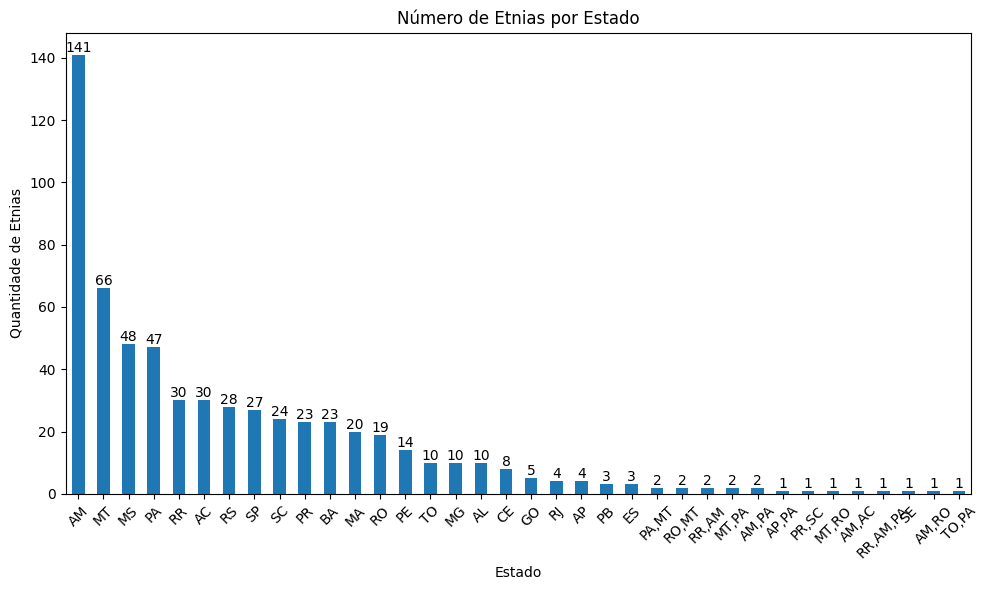

In [23]:
plt.figure(figsize=(10, 6))

df_etnia_estado.plot(kind='bar')
for i, v in enumerate(df_etnia_estado):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Número de Etnias por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Etnias')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Gráfico 2: Qual é a distribuição de etnias no Amazonas?

C:\Users\Anutcha\AppData\Local\Temp\ipykernel_24700\1580894025.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


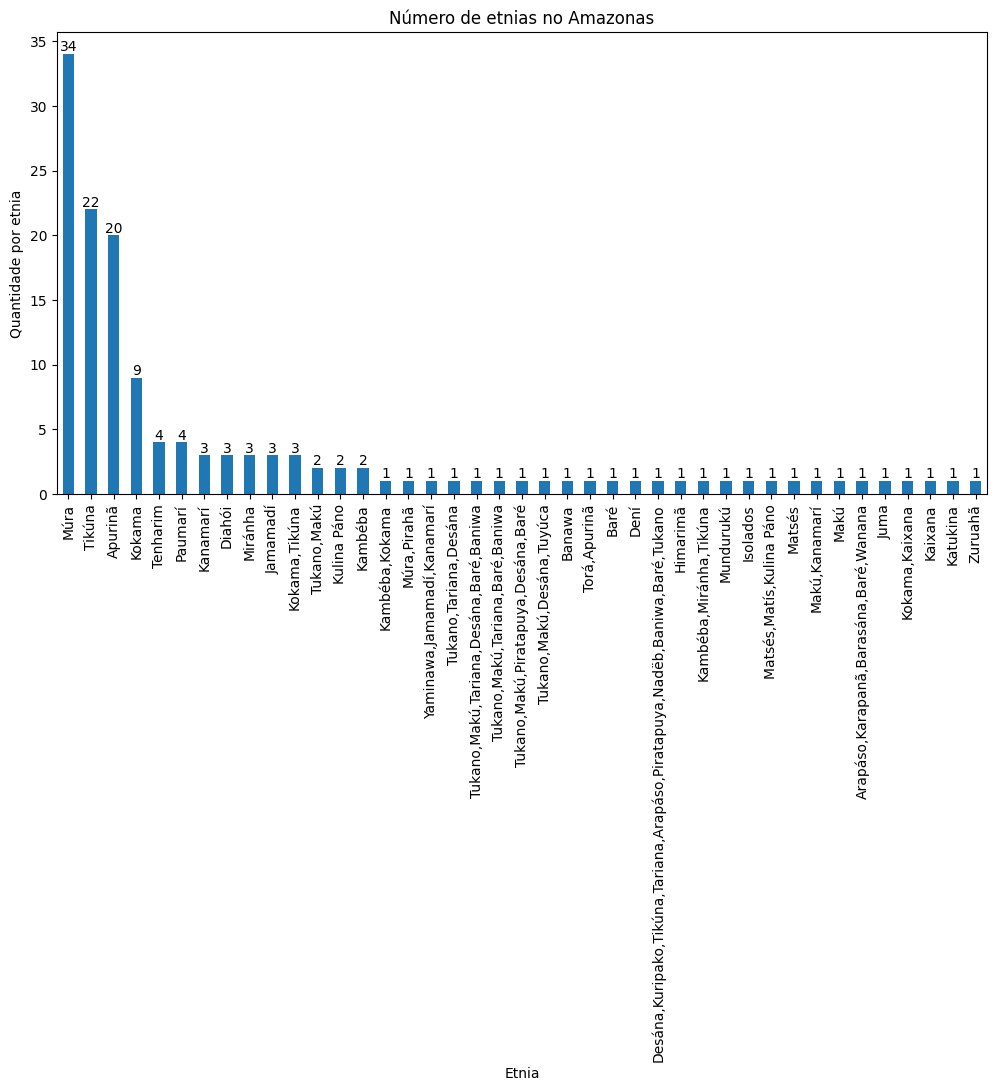

In [24]:
plt.figure(figsize=(12, 6))

etnia_am.plot(kind='bar')
for i, v in enumerate(etnia_am):
    plt.text(i, v, str(v), ha='center', va='bottom')

etnia_am.plot(kind='bar')
plt.title('Número de etnias no Amazonas')
plt.xlabel('Etnia')
plt.ylabel('Quantidade por etnia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Gráfico 3: Quais os municípios do Amazonas com mais terras indígenas?

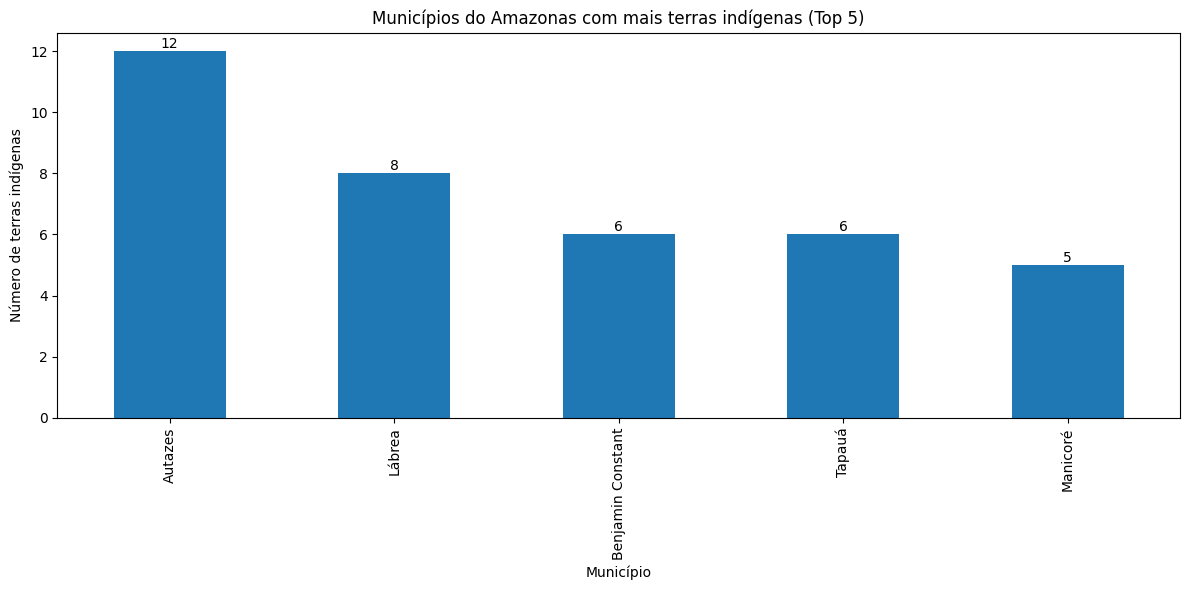

In [32]:
municipios_am = df_amazonas.groupby('nome_municipio')['etnia'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
ax = municipios_am.plot(kind='bar')
plt.title('Municípios do Amazonas com mais terras indígenas (Top 5)')
plt.xlabel('Município')
plt.ylabel('Número de terras indígenas')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()